In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
import math

In [30]:
waves_zscore = np.load(r'F:\Projects\PAE_PlaceCell\analysis\cell_recruitment\processed\waves_zscore.npy')
acg_narrow = np.load(r'F:\Projects\PAE_PlaceCell\analysis\cell_recruitment\processed\acg_narrow.npy')
df_cell_class = pd.read_csv('F:/Projects/PAE_PlaceCell/analysis/cell_recruitment/processed/pyr_int_df.csv')
df_cell_class


,session,tetrode,cell,acg_tau_decay,acg_tau_rise,acg_c,acg_d,acg_asymptote,acg_refrac,acg_tau_burst,...,ab_ratio,trough,spkW,short_isi,lv,cv,avg_fr,asymmetry,n_spikes,cell_type
0,LEM3116_S20180715121821,TT1.mat,1,31.546309,0.573929,7.484840,1.810424,4.267133,3.757487,0.577317,...,-0.254493,-2.393640,0.777777,0.021529,1.149097,1.535871,2.529014,3.181064,7340,narrow_int
1,LEM3116_S20180715121821,TT1.mat,2,2.066006,2.058184,99.344603,1.086215,2.731016,7.293023,2.071859,...,1.090940,-2.027969,0.930761,0.010545,1.041924,1.479007,0.392445,1.947498,1139,pyr
2,LEM3116_S20180715121821,TT2.mat,1,26.506166,0.781068,15.805209,1.504109,4.955974,4.657924,0.788345,...,-0.322934,-2.491995,0.777777,0.041928,1.235779,1.773778,2.580697,3.908416,7490,narrow_int
3,LEM3116_S20180715121821,TT3.mat,1,4.712647,3.339123,44.065945,3.111166,0.573573,1.285490,0.985114,...,0.015098,-2.784299,0.571703,0.000555,1.032228,0.999013,0.621228,3.730098,1803,narrow_int
4,LEM3116_S20180715121821,TT3.mat,2,69.711440,1.119072,2.272114,4.029701,6.440918,4.588725,1.144437,...,-0.113610,-2.683800,0.684153,0.011062,0.983793,1.406165,2.959360,3.743105,8589,narrow_int
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8508,RH16_S20161207130000,TT7.mat,5,13.648150,19.260993,4.054789,2.763695,3.311529,0.086722,4.997810,...,-0.270218,-2.886261,0.529358,0.000000,1.059228,5.973929,0.789008,4.629547,1252,narrow_int
8509,RH16_S20161207130000,TT7.mat,6,465.286016,6.540656,9.476762,1.811303,12.260592,0.000135,5.000000,...,-0.289104,-3.028445,0.271706,0.004489,0.735687,23.134516,13.056442,2.818769,20718,narrow_int
8510,RH16_S20161207130000,TT8.mat,1,40.117754,49.985020,7.880123,1.435894,3.685590,0.000087,0.100000,...,-0.916189,-2.461559,0.286010,0.000000,0.955257,6.281825,0.626417,21.188431,994,narrow_int
8511,RH16_S20161207130000,TT8.mat,2,5.123286,5.122541,5.461216,5.218173,9.395189,0.011953,4.965692,...,-0.145166,-2.361157,0.701930,0.021382,0.999326,31.814075,1.533272,2.350860,2433,narrow_int


In [3]:
df_cell_class.keys()

Index(['session', 'tetrode', 'cell', 'acg_tau_decay', 'acg_tau_rise', 'acg_c',
       'acg_d', 'acg_asymptote', 'acg_refrac', 'acg_tau_burst', 'acg_h',
       'acg_fit_rsquare', 'thetaModulationIndex', 'burstIndex_Royer2012',
       'burstIndex_Doublets', 'polarity', 'peaktoTrough', 'troughtoPeak',
       'derivative_TroughtoPeak', 'peakA', 'peakB', 'ab_ratio', 'trough',
       'spkW', 'short_isi', 'lv', 'cv', 'avg_fr', 'asymmetry', 'n_spikes',
       'cell_type'],
      dtype='object')

In [26]:
df_cell_class.reset_index(drop=True)
X = df_cell_class.loc[:,'acg_tau_decay':'n_spikes'] 
X.shape
idx = np.where(np.isinf(X))
idx

# X = X[idx[0],:]
# X = np.array(df_cell_class[['peak_to_trough', 'trough_to_peak','spk_wavelet','local_variation','coeff_variation','short_isi','avg_fr','asymmetry']])

(array([ 293,  396,  427,  431,  514,  689,  709,  713,  721,  721,  800,
         807,  822,  850,  914,  966, 1027, 1153, 1435, 1454, 1521, 1763,
        1835, 1966, 1976, 1986, 1987, 1993, 2012, 2034, 2044, 2050, 2067,
        2075, 2094, 2098, 2125, 2140, 2149, 2181, 2185, 2203, 2239, 2257,
        2321, 2328, 2452, 2488, 2537, 2540, 2540, 2591, 2714, 2722, 2807,
        2864, 2875, 2995, 3018, 3336, 3393, 3394, 3902, 4588, 4610, 4708,
        5058, 5058, 5178, 5415, 5577, 5719, 5754, 6128, 6284, 6364, 6432,
        6441, 6455, 6475, 6481, 6519, 6519, 6524, 6535, 6560, 6564, 6627,
        6654, 6703, 6727, 6768, 6868, 6871, 7008, 7045, 7049, 7180, 7346,
        7451, 7494, 7532, 7619, 7831, 7859, 8091, 8122, 8170, 8234, 8237,
        8264, 8267, 8278, 8306, 8319], dtype=int64),
 array([11, 10, 11, 11, 11, 10, 10, 11, 10, 11, 10, 10, 10, 11, 10, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 10, 11, 10, 11, 11, 11, 11,

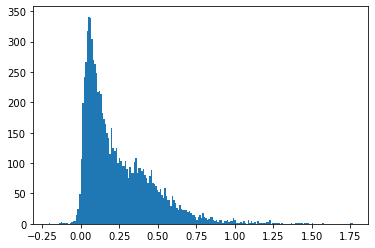

In [31]:
plt.hist(np.log10(df_cell_class.cv),200)
plt.show()

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

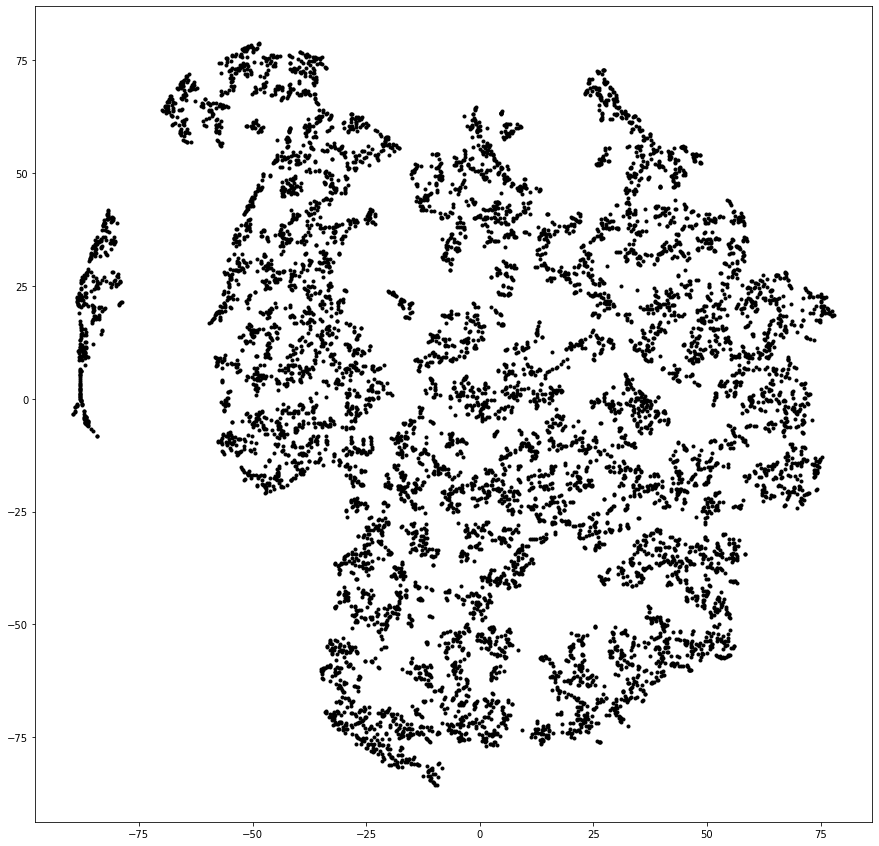

In [15]:
plt.figure(figsize = (15,15))
plt.plot(X_embedded[:,0],X_embedded[:,1],'.k')

In [27]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=.5, min_samples=10).fit(X)
print(clustering.labels_)

clustering

[ 0  0  0 ... -1 -1 -1]


DBSCAN(min_samples=10)

In [222]:
# X = np.array(X[(~np.any(np.isinf(X),1)) & (~np.any(np.isnan(X),1))])
# X = df_cell_class.loc[:,'acg_tau_decay':'n_spikes'] 

# np.isinf(X)

# df_cell_class.index[np.isinf(df_cell_class).any(1)]
# df_cell_class[~df_cell_class.isin([np.nan, np.inf, -np.inf]).any(1)]


,session,tetrode,cell,acg_tau_decay,acg_tau_rise,acg_c,acg_d,acg_asymptote,acg_refrac,acg_tau_burst,...,ab_ratio,trough,spkW,short_isi,lv,cv,avg_fr,asymmetry,n_spikes,cell_type
0,LEM3116_S20180715121821,TT1.mat,1,31.546309,0.573929,7.484840,1.810424,4.267133,3.757487,0.577317,...,-0.254493,-2.393640,0.777777,0.021529,1.149097,1.535871,2.529014,3.181064,7340,wide_int
1,LEM3116_S20180715121821,TT1.mat,2,2.066006,2.058184,99.344603,1.086215,2.731016,7.293023,2.071859,...,1.090940,-2.027969,0.930761,0.010545,1.041924,1.479007,0.392445,1.947498,1139,pyr
2,LEM3116_S20180715121821,TT2.mat,1,26.506166,0.781068,15.805209,1.504109,4.955974,4.657924,0.788345,...,-0.322934,-2.491995,0.777777,0.041928,1.235779,1.773778,2.580697,3.908416,7490,wide_int
3,LEM3116_S20180715121821,TT3.mat,1,4.712647,3.339123,44.065945,3.111166,0.573573,1.285490,0.985114,...,0.015098,-2.784299,0.571703,0.000555,1.032228,0.999013,0.621228,3.730098,1803,wide_int
4,LEM3116_S20180715121821,TT3.mat,2,69.711440,1.119072,2.272114,4.029701,6.440918,4.588725,1.144437,...,-0.113610,-2.683800,0.684153,0.011062,0.983793,1.406165,2.959360,3.743105,8589,wide_int
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,RH16_S20161207130000,TT7.mat,5,13.648150,19.260993,4.054789,2.763695,3.311529,0.086722,4.997810,...,-0.270218,-2.886261,0.529358,0.000000,1.059228,5.973929,0.789008,4.629547,1252,wide_int
8412,RH16_S20161207130000,TT7.mat,6,465.286016,6.540656,9.476762,1.811303,12.260592,0.000135,5.000000,...,-0.289104,-3.028445,0.271706,0.004489,0.735687,23.134516,13.056442,2.818769,20718,narrow_int
8413,RH16_S20161207130000,TT8.mat,1,40.117754,49.985020,7.880123,1.435894,3.685590,0.000087,0.100000,...,-0.916189,-2.461559,0.286010,0.000000,0.955257,6.281825,0.626417,21.188431,994,narrow_int
8414,RH16_S20161207130000,TT8.mat,2,5.123286,5.122541,5.461216,5.218173,9.395189,0.011953,4.965692,...,-0.145166,-2.361157,0.701930,0.021382,0.999326,31.814075,1.533272,2.350860,2433,wide_int


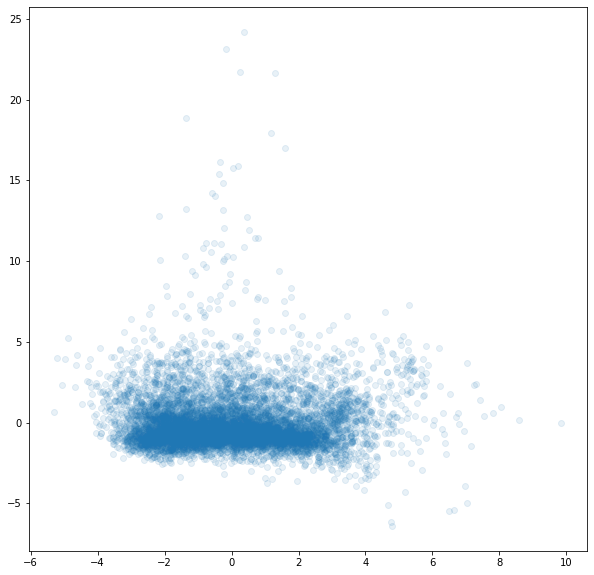

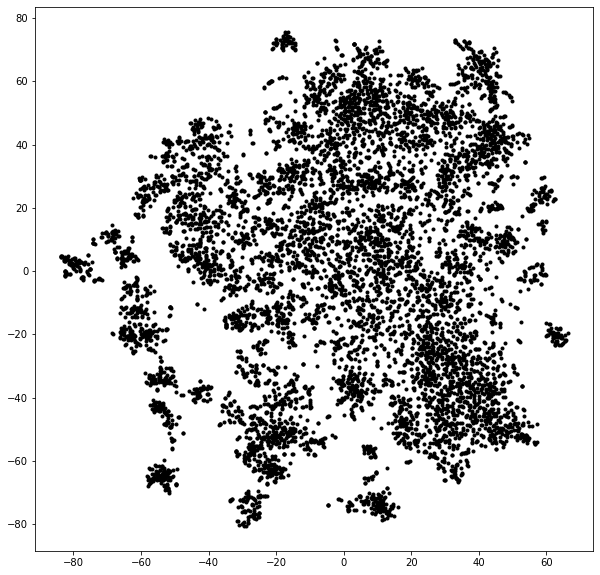

In [252]:
from sklearn.preprocessing import StandardScaler


temp_df = df_cell_class[~df_cell_class.isin([np.nan, np.inf, -np.inf]).any(1)]
X = temp_df.loc[:,'acg_tau_decay':'n_spikes'] 

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

pca = PCA(n_components=2).fit(X)
X_trans = pca.transform(X)

plt.figure(figsize=(10,10))
plt.scatter(X_trans[:,0],X_trans[:,1],alpha=.1)


from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,perplexity=50,n_iter=2000).fit_transform(X)

plt.figure(figsize = (10,10))
plt.plot(X_embedded[:,0],X_embedded[:,1],'.k')

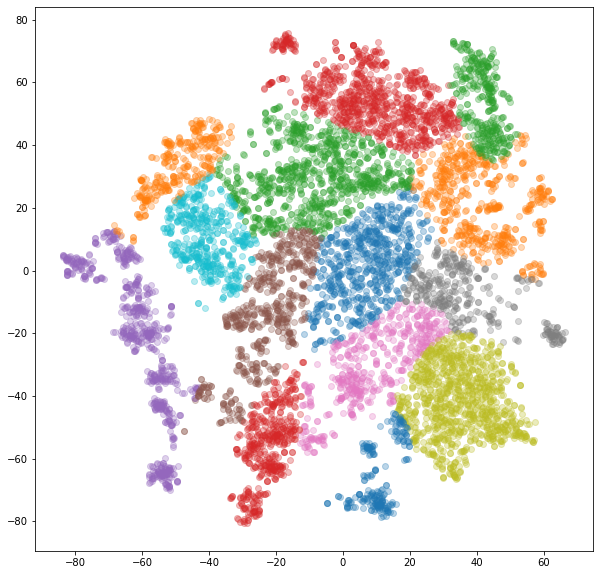

In [265]:
# from sklearn.cluster import DBSCAN

# clustering = DBSCAN(eps=.5, min_samples=5).fit(X_embedded)
# clustering.fit_predict(X_embedded)
# print(clustering.labels_)
# print(pd.unique(clustering.labels_))

gmm = mixture.GaussianMixture(n_components=15,
                              covariance_type='full')
gmm.fit(X_embedded)
labels = gmm.predict(X_embedded) 

plt.figure(figsize=(10,10))
for l in pd.unique(labels):
    plt.scatter(X_embedded[labels==l,0],X_embedded[labels==l,1],alpha = .3)


In [261]:
X_embedded.shape

(8173, 2)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# pca.fit(waves_zscore.T)
# X_trans = pca.transform(waves_zscore.T)

plt.figure(figsize=(10,10))
pca.fit(waves_zscore.T)
X_trans = pca.transform(waves_zscore.T)
plt.scatter(X_trans[:,0],X_trans[:,1],alpha=.5,label='all')

X = waves_zscore[df_cell_class.cell_type=='wide_int',:].T
pca.fit(X)
X_trans = pca.transform(X)
plt.scatter(X_trans[:,0],X_trans[:,1],alpha=.5,label='wide_int')

X = waves_zscore[df_cell_class.cell_type=='pyr',:].T
pca.fit(X)
X_trans = pca.transform(X)
plt.scatter(X_trans[:,0],X_trans[:,1],alpha=.5,label='pyr')

X = waves_zscore[df_cell_class.cell_type=='narrow_int',:].T
pca.fit(X)
X_trans = pca.transform(X)
plt.scatter(X_trans[:,0],X_trans[:,1],alpha=.5,label='narrow_int')

X = waves_zscore[df_cell_class.cell_type=='unidentified',:].T
pca.fit(X)
X_trans = pca.transform(X)
plt.scatter(X_trans[:,0],X_trans[:,1],alpha=.5,label='unidentified')

plt.legend()


labels = df_cell_class.cell_type
unique_labels = pd.unique(labels)
n_columns = 2
n_rows = math.ceil(len(unique_labels)/n_columns) 
fig, axs = plt.subplots(n_rows,n_columns, figsize=(15, 10), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=0)
axs = axs.ravel()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i,l in enumerate(pd.unique(labels)):
    axs[i].plot(waves_zscore[labels==l].T,alpha = .1,color=colors[i+1])    

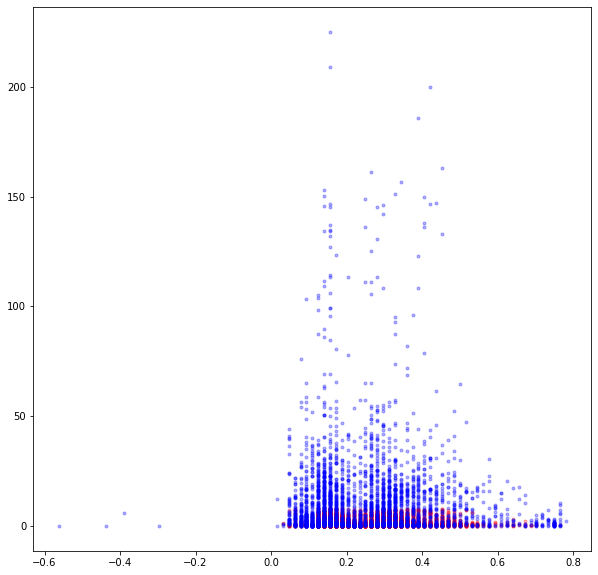

In [30]:
plt.figure(figsize = (10,10))

# plt.plot(df_cell_class.trough_to_peak,df_cell_class.avg_fr,'.k')
plt.plot(df_cell_class.trough_to_peak[clustering.labels_==0],df_cell_class.avg_fr[clustering.labels_==0],'.r',alpha=.3)
plt.plot(df_cell_class.trough_to_peak[clustering.labels_==-1],df_cell_class.avg_fr[clustering.labels_==-1],'.b',alpha=.3)


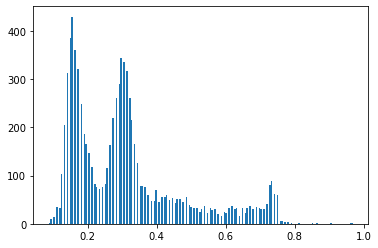

In [560]:
plt.hist(df_cell_class.troughtoPeak,200)
plt.show()

<Figure size 720x360 with 0 Axes>

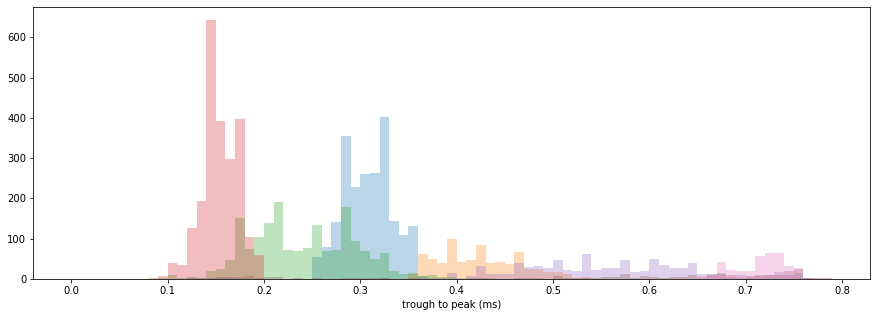

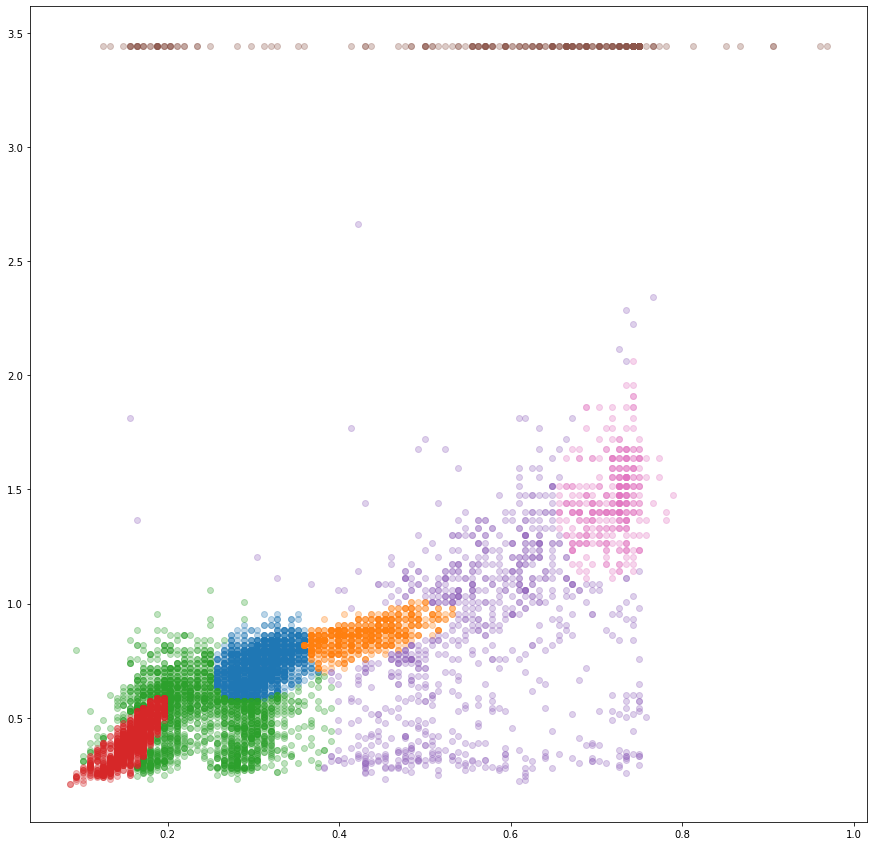

In [59]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=7)
# data = np.array(df_cell_class.trough_to_peak).reshape(-1,1)
X = np.array(df_cell_class[['troughtoPeak','spkW']])
gmm.fit(X)

labels = gmm.predict(X)

labels

# plt.figure()
# plt.hist(data[labels==0],density=True)
# plt.hist(data[labels==1],density=True)

# plt.show()


plt.figure(figsize=(10,5))
# plt.hist(df_cell_class.trough_to_peak,bins=np.arange(0,.8,.01))


# int_idx = (df_cell_class.avg_fr >= 5) & (df_cell_class.trough_to_peak < 0.25)
# pyr_idx = (df_cell_class.trough_to_peak >= 0.25)
int_idx = labels==0
pyr_idx = labels==1

plt.figure(figsize=(15,5))
for l in pd.unique(labels):
    plt.hist(df_cell_class.troughtoPeak[labels==l],bins=np.arange(0,.8,.01),alpha = .3)
    plt.xlabel('trough to peak (ms)')

plt.figure(figsize=(15,15))
for l in pd.unique(labels):
    plt.scatter(df_cell_class.troughtoPeak[labels==l],df_cell_class.spkW[labels==l],alpha = .3)


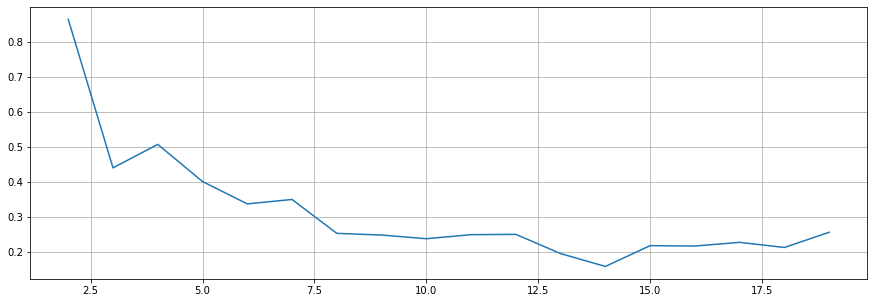

In [76]:
from sklearn import metrics

X = np.array(df_cell_class[['troughtoPeak','spkW']])
scores = []
for i in np.arange(2,20):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(X)
    labels = gmm.predict(X)
    scores.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    
plt.figure(figsize=(15,5))    
plt.plot(np.arange(2,20),scores)    
plt.grid('on')

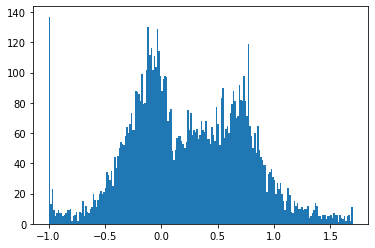

In [153]:
plt.hist(np.log10(df_cell_class.acg_tau_rise),200)
plt.show()

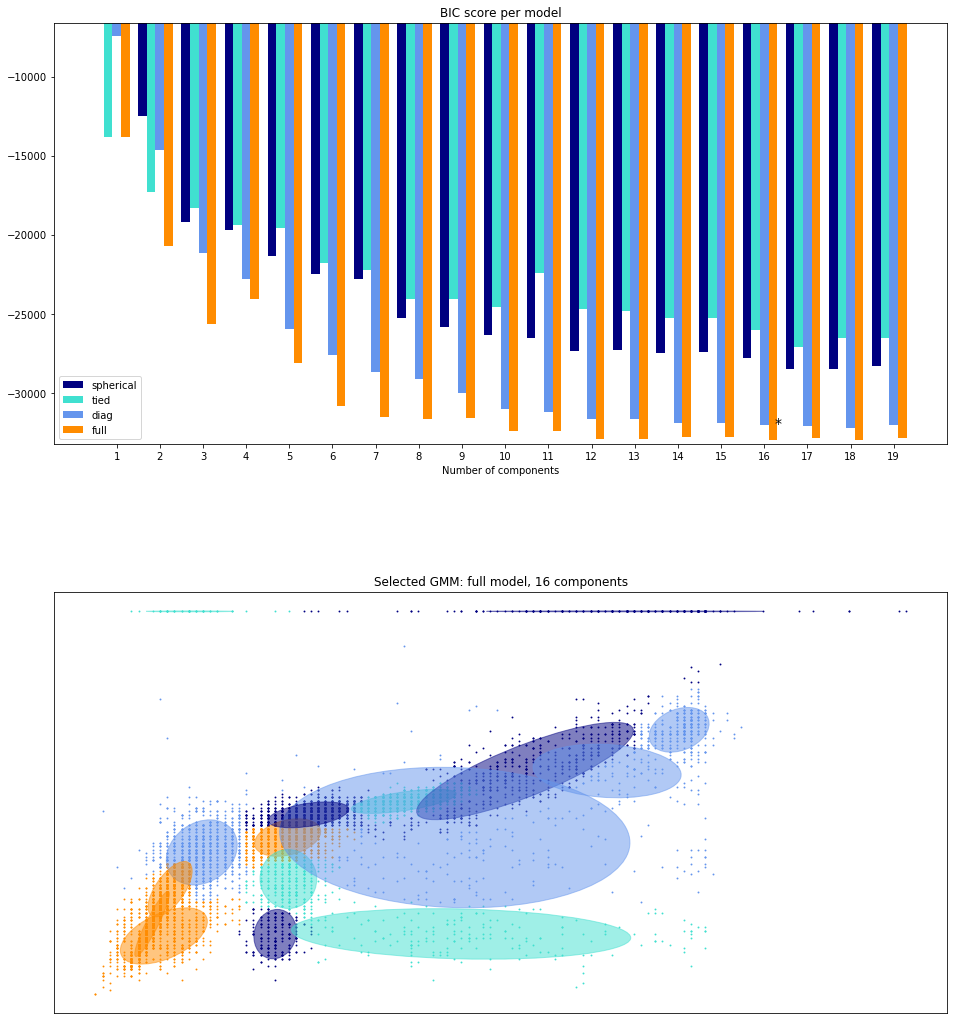

In [269]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture


# X = np.array(df_cell_class[['troughtoPeak','spkW','acg_tau_rise']])
X = np.array([df_cell_class.troughtoPeak,np.log10(df_cell_class.spkW)]).T
# X = np.array([df_cell_class.troughtoPeak,(df_cell_class.acg_tau_rise)]).T

lowest_bic = np.infty
bic = []
n_components_range = range(1, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(16, 16))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(f'Selected GMM: {best_gmm.covariance_type} model, '
          f'{best_gmm.n_components} components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

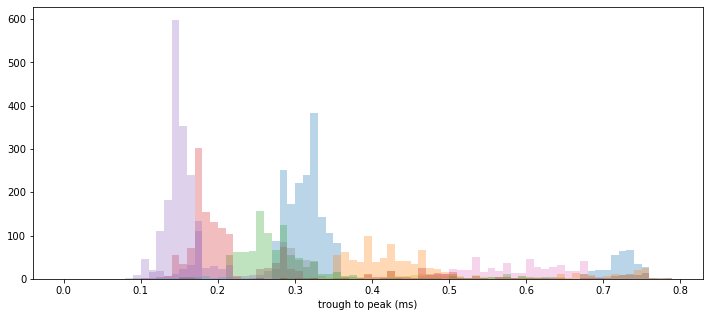

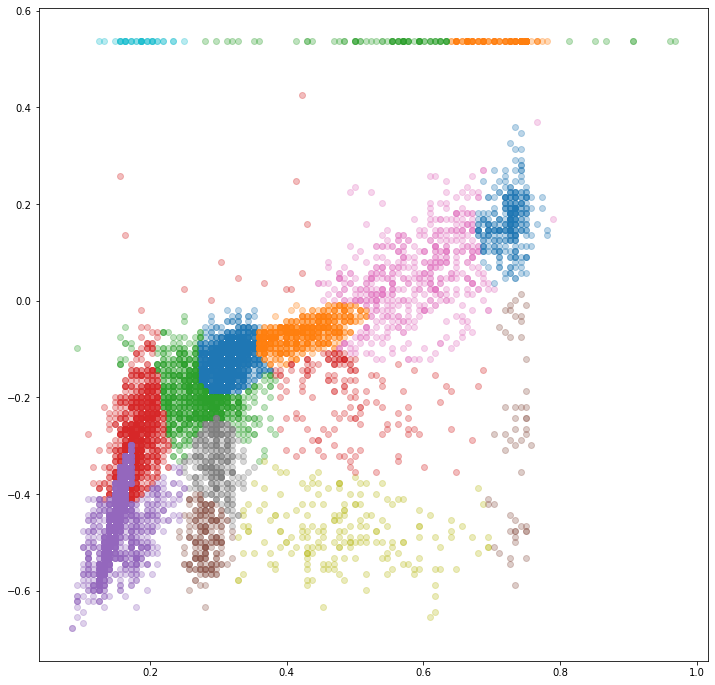

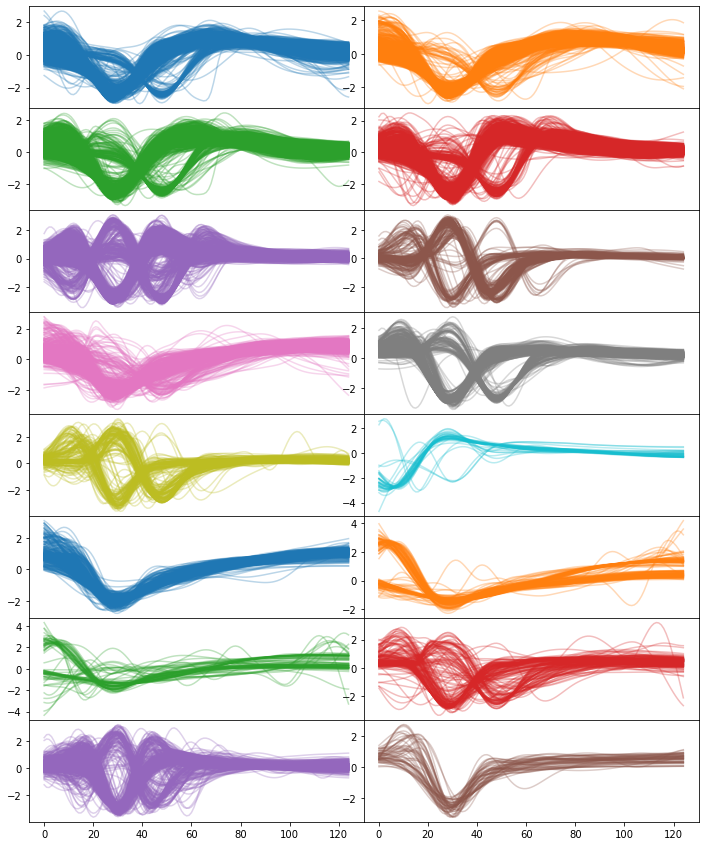

In [272]:
gmm = mixture.GaussianMixture(n_components=16,
                              covariance_type='full')
gmm.fit(X)

labels = gmm.predict(X)

plt.figure(figsize=(12,5))
for l in pd.unique(labels):
    plt.hist(df_cell_class.troughtoPeak[labels==l],bins=np.arange(0,.8,.01),alpha = .3)
    plt.xlabel('trough to peak (ms)')

plt.figure(figsize=(12,12))
for l in pd.unique(labels):
    plt.scatter(df_cell_class.troughtoPeak[labels==l],np.log10(df_cell_class.spkW[labels==l]),alpha = .3)


import math
unique_labels = pd.unique(labels)
n_columns = 2
n_rows = math.ceil(len(unique_labels)/n_columns) 
fig, axs = plt.subplots(n_rows,n_columns, figsize=(12, 15), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=0)
axs = axs.ravel()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i,l in enumerate(pd.unique(labels)):
    axs[i].plot(waves_zscore[labels==l].T,alpha = .3,color=colors[i])

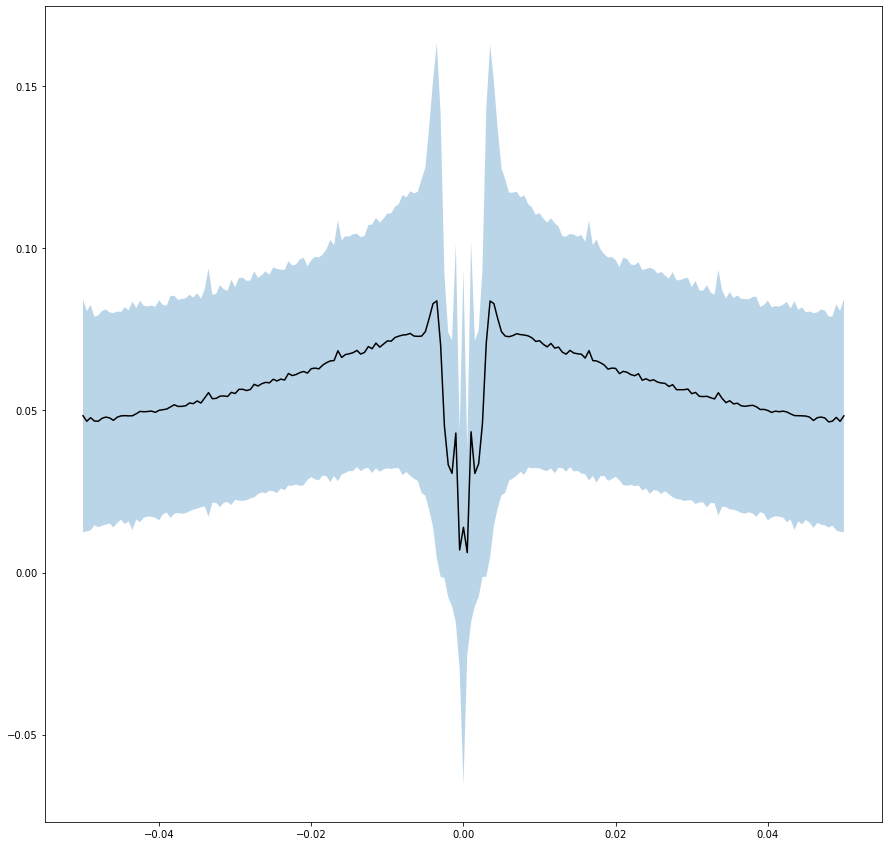

In [35]:
from scipy import stats
from sklearn import preprocessing

l = 'pyr'
l = 'narrow_int'
# l = 'wide_int'

temp_acg = acg_narrow[labels==l] 
# temp_acg = acg_narrow
temp_acg = preprocessing.normalize(temp_acg)

x = np.arange(-.05,.05+0.0005/2,0.0005)
y = np.mean(temp_acg,axis=0)
std = np.std(temp_acg,axis=0)

plt.figure(figsize=(15,15))
# plt.plot(x,temp_acg.T,alpha = 1,color=colors[i])    

plt.fill_between(x, y-std, y+std,alpha=.3)
plt.plot(x,y,'k')
plt.show()


# temp_acg.shape
# 0.0005,'duration',0.100

# pca = PCA(n_components=2).fit(temp_acg)
# X_trans = pca.transform(temp_acg)

# plt.figure()
# plt.scatter(X_trans[:,0],X_trans[:,1],alpha=.2)

In [459]:
df_swr = pd.read_csv(r'F:\Projects\PAE_PlaceCell\analysis\swr_data\post_processed\swr_df.csv')
df_swr[df_swr.session == 'LS19_S20170507185907']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ripple_number,start_time,end_time,ripple_duration,max_emg,peak_time,peak_channel,peak_amplitude,peak_freq,clipped,session,ep_type,group,area,ripple_duration_log10,peak_amplitude_log10,rat
17135,17135,17135,17389,3,99.4880,99.6488,0.1608,0.980983,99.5544,0,9.190613,135.594142,0.000000,LS19_S20170507185907,track,pae,ca1,-0.793714,0.963344,LS19
17136,17136,17136,17390,13,469.4568,469.7440,0.2872,0.949795,469.6744,5,4.580759,152.975385,0.000000,LS19_S20170507185907,track,pae,ca1,-0.541816,0.660937,LS19
17137,17137,17137,17391,23,1013.5616,1013.8280,0.2664,0.223654,1013.6104,5,20.676892,222.061456,0.000000,LS19_S20170507185907,pedestal_2,pae,ca1,-0.574466,1.315485,LS19
17138,17138,17138,17392,25,1023.8768,1024.0392,0.1624,0.334161,1023.9832,5,46.705526,115.313307,0.013333,LS19_S20170507185907,pedestal_2,pae,ca1,-0.789414,1.669368,LS19
17139,17139,17139,17393,32,1110.5416,1110.7296,0.1880,0.321611,1110.5816,5,12.605020,98.691442,0.000000,LS19_S20170507185907,pedestal_2,pae,ca1,-0.725842,1.100544,LS19
17140,17140,17140,17394,65,2185.9000,2186.0760,0.1760,0.901348,2186.0080,1,6.071346,193.729022,0.000000,LS19_S20170507185907,pedestal_3,pae,ca1,-0.754487,0.783285,LS19
17141,17141,17141,17395,66,2220.0392,2220.2752,0.2360,0.685853,2220.1240,1,25.301694,164.553424,0.000000,LS19_S20170507185907,pedestal_3,pae,ca1,-0.627088,1.403150,LS19
17142,17142,17142,17396,67,2220.3080,2220.5144,0.2064,0.524962,2220.4648,7,76.227481,118.390065,0.040000,LS19_S20170507185907,pedestal_3,pae,ca1,-0.685290,1.882112,LS19
17143,17143,17143,17398,68,2220.8016,2221.3344,0.5328,0.627674,2220.9672,1,26.440570,139.659159,0.000000,LS19_S20170507185907,pedestal_3,pae,ca1,-0.273436,1.422271,LS19


In [40]:
import statistics
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

def get_h0_z_energy(h0_counts,binsize=.0005,window=15):
    # smooth to get expected firing rate
    hist_smooth = gaussian_filter1d(h0_counts,window)
    # subtract the expected rates and devided by the standard deviation to get z-scored modulation
    z = (h0_counts - hist_smooth) / np.sqrt(hist_smooth)
    return z, hist_smooth


x = np.arange(-.05,.05+0.0005/2,0.0005)
possible_bad = []
for acg in acg_narrow:
    acg = acg/acg.sum()
    
    z, hist_smooth = get_h0_z_energy(acg)
    z = z[x>0]
    hist_smooth = hist_smooth[x>0]
    peaks, _ = find_peaks(z,hist_smooth*5)
    if len(peaks)>1:
        possible_bad.append((peaks[0] >= 32) & (peaks[0] <= 34) & (peaks[1] >= 66) & (peaks[1] <= 68))
    else:
        possible_bad.append(False)    

    
# acg = acg_narrow[7474]

# acg = acg/acg.sum()


# plt.figure(figsize=(10,10))


# x = np.arange(-.05,.05+0.0005/2,0.0005)

# z, hist_smooth = get_h0_z_energy(acg)
# z = z[x>0]
# hist_smooth = hist_smooth[x>0]

# plt.plot(z)
# plt.plot(hist_smooth*5)
# peaks, _ = find_peaks(z,hist_smooth*5)
# plt.plot(peaks, z[peaks], "x")
# peaks

# (peaks[0] >= 32) & (peaks[0] <= 34) & (peaks[1] >= 66) & (peaks[1] <= 68)


<ipython-input-40-5d95592c9d2a>:16: RuntimeWarning: invalid value encountered in true_divide
  acg = acg/acg.sum()
<ipython-input-40-5d95592c9d2a>:9: RuntimeWarning: invalid value encountered in true_divide
  z = (h0_counts - hist_smooth) / np.sqrt(hist_smooth)


In [39]:
np.any(possible_bad)

False

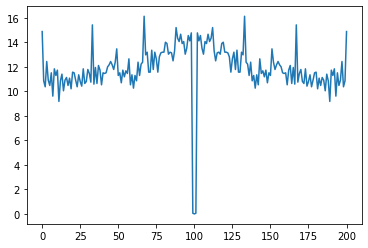

,session,tetrode,cell,acg_tau_decay,acg_tau_rise,acg_c,acg_d,acg_asymptote,acg_refrac,acg_tau_burst,...,ab_ratio,trough,spkW,short_isi,lv,cv,avg_fr,asymmetry,n_spikes,cell_type
7370,LS17_S20170606230236,TT2.mat,5,23.205677,0.841819,2.957891,5.10065,10.540814,4.639803,0.8469,...,0.323768,-2.897367,0.351159,0.018369,0.957328,1.17335,9.609399,1.84574,36856,narrow_int


In [20]:
plt.plot(acg_narrow[possible_bad].T)
plt.show()
df_cell_class[possible_bad]

In [556]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 
lst2 = list(pd.unique(df_cell_class[possible_bad].session))
lst1 = list(pd.unique(df_swr.session))
print(intersection(lst1, lst2))

['LS17_S20170507142720', 'LS17_S20170507171105', 'LS17_S20170508214712', 'LS17_S20170606230236', 'LS19_S20170507185907', 'LS19_S20170508205640', 'LS19_S20170515113552', 'LS19_S20170516151632', 'LS19_S20170522113749']


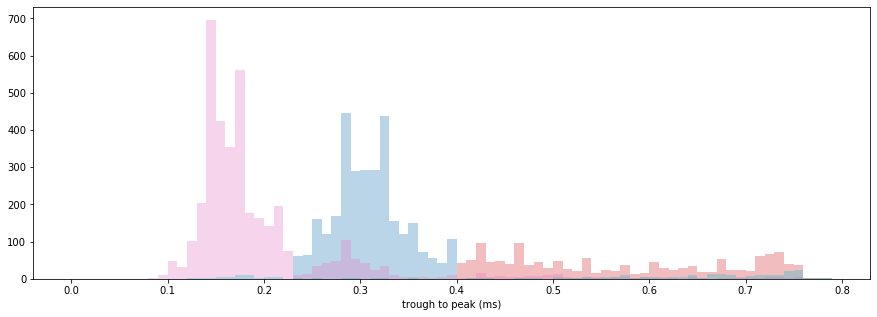

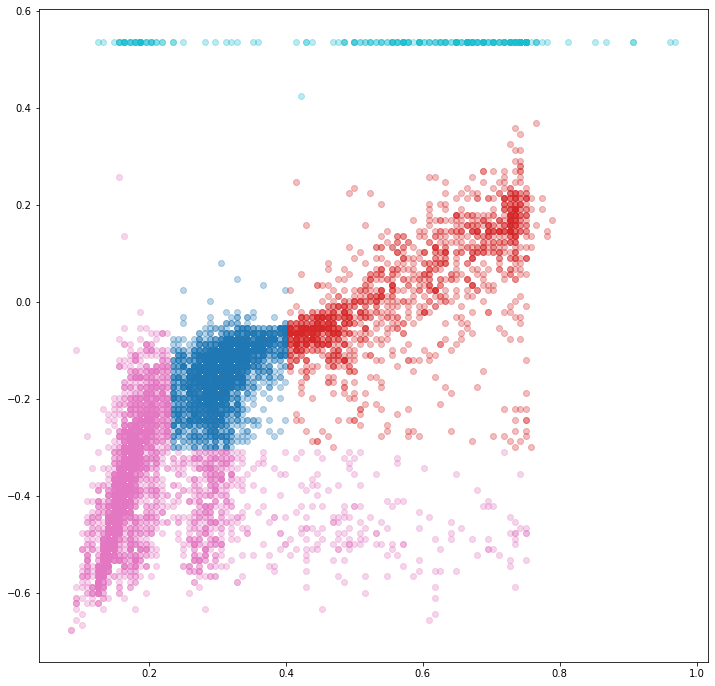

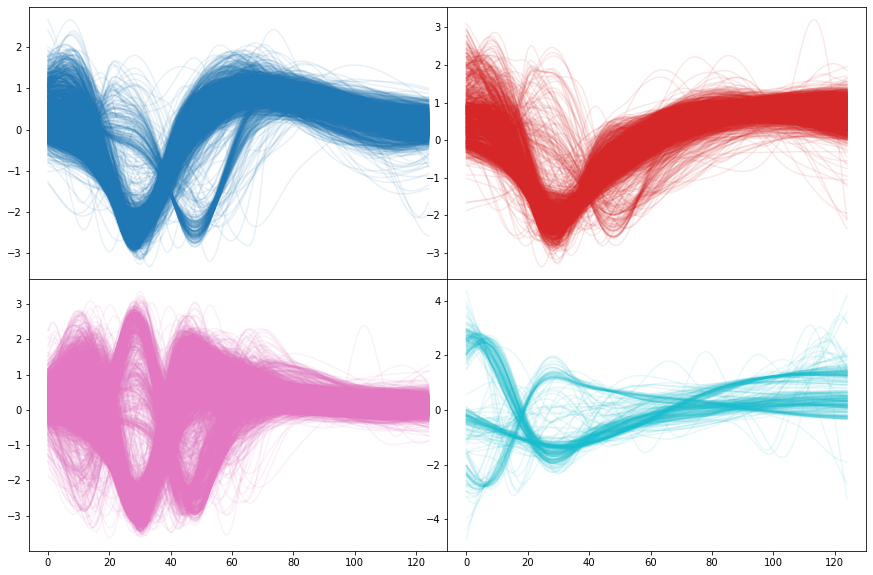

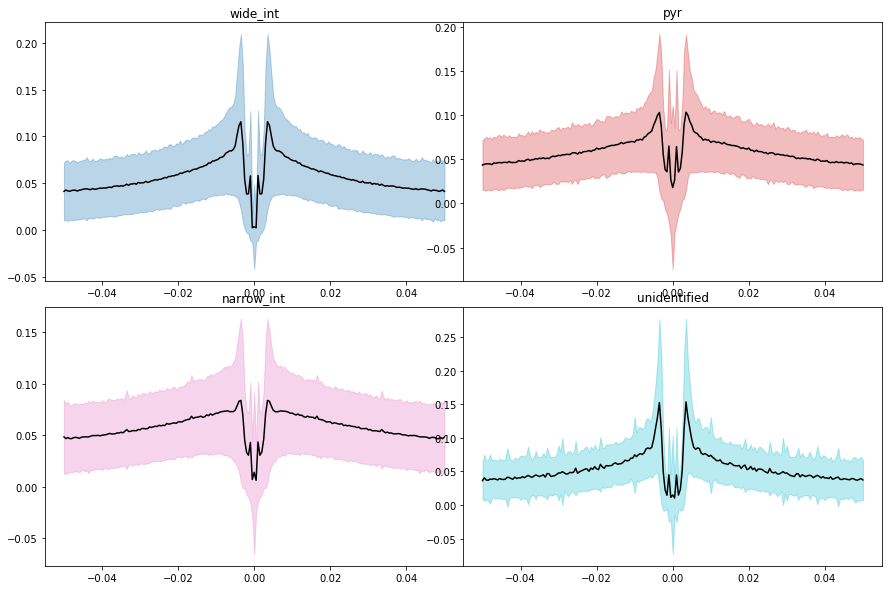

In [32]:
import math
# from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# df_cell_class.cell_type = 'unidentified';

# df_cell_class.loc[(df_cell_class.troughtoPeak > .4) & (np.log10(df_cell_class.spkW) < 0.4), "cell_type"] = 'pyr'
# df_cell_class.loc[(df_cell_class.troughtoPeak <= .4) & (np.log10(df_cell_class.spkW) < 0.4), "cell_type"] = 'int'
# df_cell_class.loc[(np.log10(df_cell_class.spkW) < -0.3) & (df_cell_class.troughtoPeak > .4), "cell_type"] = 'int'

# df_cell_class.cell_type = 'pyr'
# df_cell_class.loc[(df_cell_class.troughtoPeak <= 0.425), "cell_type"] = 'narrow_int'
# df_cell_class.loc[(df_cell_class.troughtoPeak > 0.425) & (df_cell_class.acg_tau_rise > 6) , "cell_type"] = 'wide_int'


df_cell_class.cell_type = 'unidentified';
df_cell_class.loc[(df_cell_class.troughtoPeak < .23), "cell_type"] = 'narrow_int'
df_cell_class.loc[(df_cell_class.troughtoPeak >= .23) & (df_cell_class.troughtoPeak < .4), "cell_type"] = 'wide_int'
df_cell_class.loc[(df_cell_class.troughtoPeak >= .4), "cell_type"] = 'pyr'
df_cell_class.loc[(np.log10(df_cell_class.spkW) < -0.3) & (df_cell_class.troughtoPeak >= .4), "cell_type"] = 'narrow_int'
df_cell_class.loc[(np.log10(df_cell_class.spkW) >= 0.4), "cell_type"] = 'unidentified'
df_cell_class.loc[((df_cell_class.troughtoPeak >= .23) &
                   (df_cell_class.troughtoPeak < .4) &
                   (np.log10(df_cell_class.spkW) < -0.3)), "cell_type"] = 'narrow_int'

labels = df_cell_class.cell_type
cmap = plt.get_cmap("tab10",len(pd.unique(labels)))

plt.figure(figsize=(15,5))
for i,l in enumerate(pd.unique(labels)):
    plt.hist(df_cell_class.troughtoPeak[df_cell_class.cell_type==l],bins=np.arange(0,.8,.01),alpha = .3,color=cmap(i))
    plt.xlabel('trough to peak (ms)')

plt.figure(figsize=(12,12))

for i,l in enumerate(pd.unique(labels)):
    plt.scatter(df_cell_class.troughtoPeak[labels==l],np.log10(df_cell_class.spkW[labels==l]),alpha = .3,color=cmap(i))


# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(111, projection='3d')

# for l in pd.unique(df_cell_class.cell_type):
#     ax.scatter(df_cell_class.troughtoPeak[df_cell_class.cell_type==l],
#                 np.log10(df_cell_class.spkW[df_cell_class.cell_type==l]),
#                 np.log10(df_cell_class.acg_tau_rise[df_cell_class.cell_type==l]),
#                alpha=.3)
# plt.show()


labels = df_cell_class.cell_type
unique_labels = pd.unique(labels)
n_columns = 2
n_rows = math.ceil(len(unique_labels)/n_columns) 
fig, axs = plt.subplots(n_rows,n_columns, figsize=(15, 10), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=0)
axs = axs.ravel()
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
cmap = plt.get_cmap("tab10",len(pd.unique(labels)))

for i,l in enumerate(pd.unique(labels)):
    axs[i].plot(waves_zscore[labels==l].T,alpha = .1,color=cmap(i))    
    
    
labels = df_cell_class.cell_type
unique_labels = pd.unique(labels)
n_columns = 2
n_rows = math.ceil(len(unique_labels)/n_columns) 
fig, axs = plt.subplots(n_rows,n_columns, figsize=(15, 10), edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0)
axs = axs.ravel()
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
cmap = plt.get_cmap("tab10",len(pd.unique(labels)))

for i,l in enumerate(pd.unique(labels)):        
    temp_acg = acg_narrow[labels==l] 
    temp_acg = preprocessing.normalize(temp_acg)

    x = np.arange(-.05,.05+0.0005/2,0.0005)
    y = np.mean(temp_acg,axis=0)
    std = np.std(temp_acg,axis=0)
    axs[i].fill_between(x, y-std, y+std,color=cmap(i),alpha=.3)
    axs[i].plot(x,y,'k')
    axs[i].set_title(l)


In [383]:
plt.rcParams['axes.prop_cycle'].by_key()['color']
cmap = plt.get_cmap("tab10",100)
cmap(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [297]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

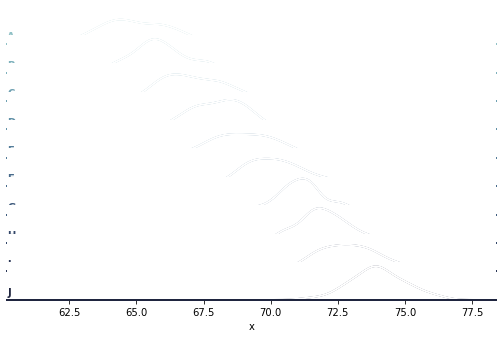

In [289]:
temp_df = df_cell_class.loc[:,'acg_tau_decay':'n_spikes'] 


for (columnName, columnData) in temp_df.iteritems():
    plt.figure(figsize=(12,5))
    for l in pd.unique(labels):
        plt.hist(columnData[labels==l],200,alpha = .3)
        plt.xlabel(columnName)
         

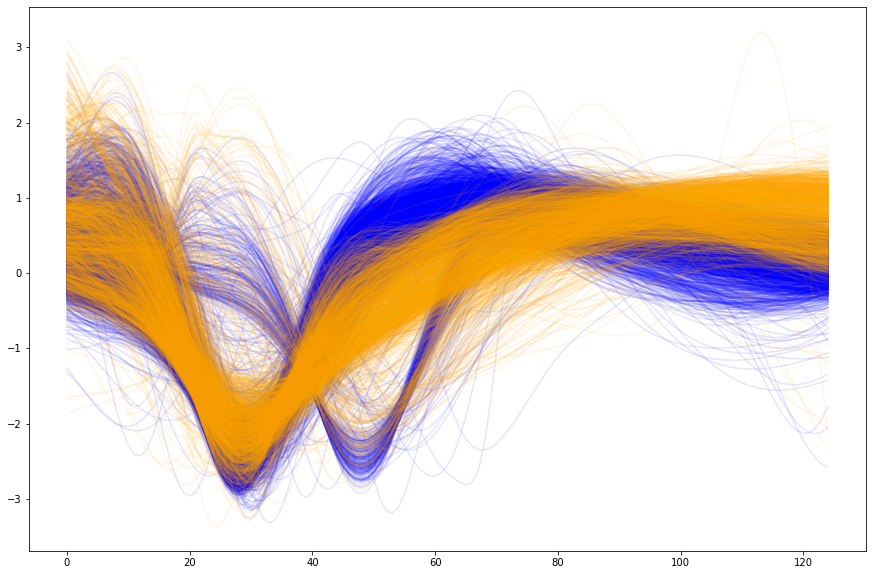

In [280]:
plt.figure(figsize=(15,10))
plt.plot(waves_zscore[df_cell_class.cell_type=='wide_int'].T,alpha = .1,color='blue')    

plt.plot(waves_zscore[df_cell_class.cell_type=='pyr'].T,alpha = .1,color='orange')    
plt.show()

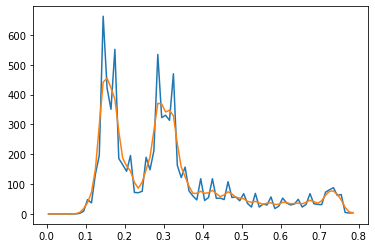

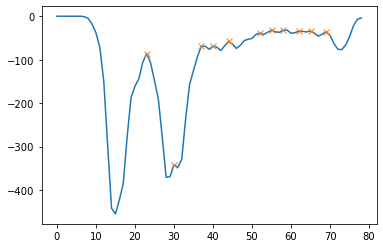

In [60]:
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

hist,bin_edges=np.histogram(df_cell_class.troughtoPeak,bins=np.arange(0,.8,.01))
bin_centers = np.arange(0+0.01/2,.8-0.01/2,.01)
smooth_hist = gaussian_filter1d(hist, 1)

plt.figure()
plt.plot(bin_centers,hist)
plt.plot(bin_centers,smooth_hist)

peaks, _ = find_peaks(-smooth_hist)
plt.figure()
plt.plot(-smooth_hist)
plt.plot(peaks, -smooth_hist[peaks], "x")

In [61]:
bin_centers[peaks]

array([0.235, 0.305, 0.375, 0.405, 0.445, 0.525, 0.555, 0.585, 0.625,
       0.655, 0.695])

In [6]:
import numpy as np
fname = r'F:\Projects\PAE_PlaceCell\data\LEM3116\2018-08-07_10-52-47\lfp_ts.dat'
x = np.fromfile(fname)

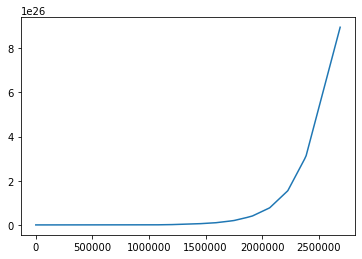

In [7]:
from matplotlib import pyplot as plt

plt.plot(x)

In [17]:
fname = r'F:\Projects\PAE_PlaceCell\data\LEM3116\2018-08-07_10-52-47\lfp_ts.npy'

ts = np.load(fname)

ts = ts.reshape(-1)
ts.shape

(5379200,)

In [47]:
swr_df = pd.read_csv(r'F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/swr_df.csv')
df_ripple_rate = pd.read_csv(r'F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/df_ripple_rate.csv')

rat = [s.split('_')[0] for s in swr_df.session]
swr_df['rat']=rat

rat = [s.split('_')[0] for s in df_ripple_rate.session]
df_ripple_rate['rat']=rat






df_all_cells = pd.read_csv(r'D:\ryanh\github\harvey_et_al_2020\Rdata_pae_track_cylinder_all_cells.csv')

def get_area(df,df_all_cells):
    areas = []
    for ripple in df.itertuples():
        idx = np.where(ripple.session+'.mat' == df_all_cells.session)[0][0]
        areas.append(df_all_cells.area.iloc[idx])

    df['area'] = areas
    return df

swr_df = get_area(swr_df,df_all_cells)
display(swr_df)
df_ripple_rate = get_area(df_ripple_rate,df_all_cells)
display(df_ripple_rate)


,Unnamed: 0,Unnamed: 0.1,ripple_number,start_time,end_time,ripple_duration,max_emg,peak_time,peak_channel,peak_amplitude,peak_freq,clipped,session,ep_type,group,rat,area
0,0,0,22,211.247200,211.327200,0.080000,0.990871,211.296000,3,5.566472,213.605249,0.000000,LEM3116_S20180715121821,track,control,LEM3116,ca1
1,1,1,60,517.919200,518.311200,0.392000,0.995188,518.087200,7,29.168512,203.155556,0.000000,LEM3116_S20180715121821,track,control,LEM3116,ca1
2,2,2,72,607.938400,608.326400,0.388000,0.990928,607.964000,3,7.932019,103.616382,0.000000,LEM3116_S20180715121821,track,control,LEM3116,ca1
3,3,3,80,675.985600,676.139200,0.153600,0.994272,676.074400,7,5.077734,173.913383,0.000000,LEM3116_S20180715121821,track,control,LEM3116,ca1
4,4,4,100,933.226400,933.424000,0.197600,0.992893,933.278400,7,27.285162,119.721685,0.000000,LEM3116_S20180715121821,pedestal_2,control,LEM3116,ca1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17377,17377,17638,25,255.450400,255.599200,0.148800,0.314032,255.533600,7,8.094016,105.746020,0.000000,RH16_S20161126145021,track,pae,RH16,ca1
17378,17378,17639,22,149.384000,149.505600,0.121600,0.133732,149.436800,6,12.060743,186.017137,0.000000,RH16_S20161126150318,track,pae,RH16,ca1
17379,17379,17640,32,233.419200,233.576000,0.156800,0.260312,233.496000,7,8.145433,110.793201,0.000000,RH16_S20161126150318,track,pae,RH16,ca1
17380,17380,17641,36,270.288000,270.410400,0.122400,0.065024,270.328800,0,4.390508,174.380797,0.000000,RH16_S20161126150318,track,pae,RH16,ca1


,Unnamed: 0,Unnamed: 0.1,ripple_rate,session,group,rat,area
0,0,0,0.010138,LEM3116_S20180715121821,control,LEM3116,ca1
1,1,1,0.035514,LEM3116_S20180715160836,control,LEM3116,ca1
2,2,2,0.017809,LEM3116_S20180716115155,control,LEM3116,ca1
3,3,3,0.021395,LEM3116_S20180716174306,control,LEM3116,ca1
4,4,4,0.216545,LEM3116_S20180717110938,control,LEM3116,ca1
...,...,...,...,...,...,...,...
184,184,184,0.006446,RH16_S20161021165052,pae,RH16,ca1
185,185,185,0.022714,RH16_S20161030145324,pae,RH16,ca1
186,186,186,0.012127,RH16_S20161126145021,pae,RH16,ca1
187,187,187,0.029756,RH16_S20161126150318,pae,RH16,ca1


In [48]:
save_path = 'F:/Projects/PAE_PlaceCell/analysis/swr_data/'
swr_df.to_csv(save_path+'post_processed/swr_df.csv')
df_ripple_rate.to_csv(save_path+'post_processed/df_ripple_rate.csv')

In [2]:
import pandas as pd
# df <- read.csv('D:/ryanh/github/harvey_et_al_2020/Rdata_pae_track_cylinder_all_cells.csv')
df_all_cells = pd.read_csv(r'D:\ryanh\github\harvey_et_al_2020\Rdata_pae_track_cylinder_all_cells.csv')

rat = [s.split('_')[0] for s in df_all_cells.session]
df_all_cells['rat']=rat
df_all_cells
df_all_cells.to_csv(r'D:\ryanh\github\harvey_et_al_2020\Rdata_pae_track_cylinder_all_cells.csv')

,InformationContent,Coherence,Sparsity,PeakRate,OverallFiringRate,Field2Wall,FieldWidth,nfields,nSpikes,mean_vector_length,...,corrected_sparsity,correction_fit,runningdir,session,tt,cell,area,group,mazetype,rat
0,0.284860,2.052213,0.707678,2.874353,1.012954,18.000000,51.0,1,406,0.242845,...,NaN,NaN,1,RH13_S20160810100000.mat,TT1.mat,1,ca1,control,track,RH13
1,0.016107,1.613034,0.976040,34.113605,27.112564,24.000000,114.0,1,8033,0.054474,...,NaN,NaN,1,RH13_S20160810100000.mat,TT1.mat,2,ca1,control,track,RH13
2,0.016141,1.158196,0.973861,2.656393,1.909395,30.000000,114.0,1,502,0.061715,...,NaN,NaN,1,RH13_S20160810100000.mat,TT1.mat,3,ca1,control,track,RH13
3,0.019638,1.511620,0.964051,3.730551,2.603170,57.000000,114.0,1,721,0.143732,...,NaN,NaN,1,RH13_S20160810100000.mat,TT1.mat,4,ca1,control,track,RH13
4,0.026284,1.730436,0.956370,6.246069,3.695296,12.000000,114.0,1,1019,0.096693,...,NaN,NaN,1,RH13_S20160810100000.mat,TT1.mat,5,ca1,control,track,RH13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17740,0.019882,1.547275,0.807732,15.822223,9.109205,5.812810,76.5,1,4839,0.027588,...,0.661550,-7551.123597,1,LEM3246_S20190915154448.mat,TT5.mat,26,ca3,pae,cylinder,LEM3246
17741,0.014332,1.532043,0.814195,21.256807,13.357785,6.762594,76.5,1,7101,0.020689,...,0.721120,-9739.367552,1,LEM3246_S20190915154448.mat,TT6.mat,30,ca3,pae,cylinder,LEM3246
17742,0.022310,1.758252,0.803708,24.795714,16.503034,7.852953,76.5,1,8656,0.002974,...,0.725901,-11071.132578,1,LEM3246_S20190915154448.mat,TT6.mat,31,ca3,pae,cylinder,LEM3246
17743,0.362356,1.849311,0.470324,7.944641,1.538123,6.586179,76.5,1,842,0.142501,...,0.118532,-1829.461329,1,LEM3246_S20190915154448.mat,TT6.mat,133,ca3,pae,cylinder,LEM3246


In [9]:
import numpy as np
def get_area(df,df_all_cells):
    areas = []
    for ripple in df.itertuples():
        idx = np.where(ripple.session+'.mat' == df_all_cells.session)[0][0]
        areas.append(df_all_cells.area.iloc[idx])

    df['area'] = areas
    return df

In [10]:
df_swr = pd.read_csv('F:/Projects/PAE_PlaceCell/analysis/multiunit_data/post_processed/mua_df.csv')

rat = [s.split('_')[0] for s in df_swr.session]
df_swr['rat']=rat

df_swr = get_area(df_swr,df_all_cells)
df_swr
df_swr.to_csv('F:/Projects/PAE_PlaceCell/analysis/multiunit_data/post_processed/mua_df.csv')

,Unnamed: 0,start_time,end_time,peak_time,ripple_duration,session,ep_type,group,rat,area
0,0,64.0895,64.3285,64.2555,0.239,LEM3116_S20180715121821,track,control,LEM3116,ca1
1,1,69.6875,69.8525,69.7725,0.165,LEM3116_S20180715121821,track,control,LEM3116,ca1
2,2,75.6615,75.7805,75.7065,0.119,LEM3116_S20180715121821,track,control,LEM3116,ca1
3,3,76.6735,76.8635,76.7755,0.190,LEM3116_S20180715121821,track,control,LEM3116,ca1
4,4,82.6235,82.7045,82.6595,0.081,LEM3116_S20180715121821,track,control,LEM3116,ca1
...,...,...,...,...,...,...,...,...,...,...
53669,53669,1474.8415,1475.0365,1474.9495,0.195,RH16_S20161207130000,track,pae,RH16,ca1
53670,53670,1517.8405,1517.9865,1517.9345,0.146,RH16_S20161207130000,track,pae,RH16,ca1
53671,53671,1517.9935,1518.2105,1518.1185,0.217,RH16_S20161207130000,track,pae,RH16,ca1
53672,53672,1532.9235,1532.9785,1532.9515,0.055,RH16_S20161207130000,track,pae,RH16,ca1


In [19]:
df_swr[(df_swr.rat == 'LEM3124') & (df_swr.area == 'ca3') ]
df_swr[(df_swr.rat == 'LEM3124')]
df_swr[(df_swr.session == 'LEM3124_S20190307132509')]



,Unnamed: 0,start_time,end_time,peak_time,ripple_duration,session,ep_type,group,rat,area
16267,16267,4.6315,5.0395,4.7975,0.408,LEM3124_S20190307132509,pedestal_1,pae,LEM3124,ca1
16268,16268,5.3065,5.8165,5.3635,0.510,LEM3124_S20190307132509,pedestal_1,pae,LEM3124,ca1
16269,16269,5.8385,6.4495,5.9085,0.611,LEM3124_S20190307132509,pedestal_1,pae,LEM3124,ca1
16270,16270,6.4735,6.6995,6.5445,0.226,LEM3124_S20190307132509,pedestal_1,pae,LEM3124,ca1
16271,16271,9.5035,9.8955,9.7305,0.392,LEM3124_S20190307132509,pedestal_1,pae,LEM3124,ca1
...,...,...,...,...,...,...,...,...,...,...
16350,16350,2190.0375,2190.1355,2190.0695,0.098,LEM3124_S20190307132509,pedestal_4,pae,LEM3124,ca1
16351,16351,2213.3955,2213.4785,2213.4255,0.083,LEM3124_S20190307132509,pedestal_4,pae,LEM3124,ca1
16352,16352,2213.5115,2213.7415,2213.5565,0.230,LEM3124_S20190307132509,pedestal_4,pae,LEM3124,ca1
16353,16353,2230.9195,2231.0305,2230.9905,0.111,LEM3124_S20190307132509,pedestal_4,pae,LEM3124,ca1


In [14]:
import pickle
session = r'F:\Projects\PAE_PlaceCell\analysis\multiunit_data\LEM3124_S20190307132509.pkl'
with open(session, 'rb') as f:
    high_synchrony_event_times = pickle.load(f)
high_synchrony_event_times

,start_time,end_time,peak_time,ripple_duration
event_number,,,,
1,4.6315,5.0395,4.7975,0.408
2,5.3065,5.8165,5.3635,0.510
3,5.8385,6.4495,5.9085,0.611
4,6.4735,6.6995,6.5445,0.226
5,9.5035,9.8955,9.7305,0.392
...,...,...,...,...
84,2190.0375,2190.1355,2190.0695,0.098
85,2213.3955,2213.4785,2213.4255,0.083
86,2213.5115,2213.7415,2213.5565,0.230
